In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import os
from tqdm import tqdm
sys.path.append('../../')
import pickle as pl
import scipy.optimize as op
import corner
import emcee
from getdist import plots, MCSamples
import getdist
import matplotlib
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB, BandpassInt, Foreground, Mask, Noise, LATskyC, SATskyC
from cobi.spectra import Spectra
from cobi.calibration import Sat4Lat

In [3]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v1'
nside = 2048
cb_model = "iso"
beta = 0.35
nc = 'TOD'
alpha_lat = [0.2,0.2]
alpha_lat_err = 0.1
alpha_sat_err = 0.07

In [4]:
lat = LATskyC(libdir, nside, cb_model, beta, alpha=alpha_lat,alpha_err=alpha_lat_err, bandpass=True,verbose=True,nsplits=2,noise_model=nc)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.


In [5]:
sat = SATskyC(libdir, nside, cb_model, beta, alpha_err=alpha_sat_err, bandpass=False,verbose=True,nsplits=2,noise_model='TOD')

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Mask : INFO - Upgrading mask SAT resolution
/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scalar divide
  cov_weight[i,j] += ( tube_count * N_tels /
Noise : INFO - Noise Model: [SAT] Based on TOD and Map based simulations, directly using SO products.


In [6]:
latspectra = Spectra(lat,libdir,parallel=0,galcut=40,binwidth=5)

Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS_G40.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p24_aposcale2p0_bw5_CO_PS_G40.fits
Spectra : INFO - No parallelization


In [7]:
satspectra = Spectra(sat,libdir,parallel=0,galcut=40,CO=False,PS=False,binwidth=5)

Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_G40.fits


Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p09_aposcale2p0_bw5_G40.fits
Spectra : INFO - No parallelization


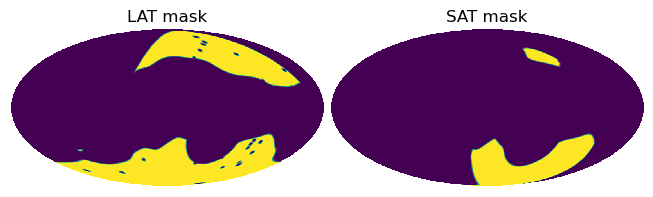

In [8]:
hp.mollview(latspectra.mask,title='LAT mask',cbar=False,sub=(1,2,1))
hp.mollview(satspectra.mask,title='SAT mask',cbar=False,sub=(1,2,2))

In [9]:
sp = latspectra.obs_x_obs(0, True)

obs x obs spectra: 100%|██████████| 4/4 [00:00<00:00, 43.32band/s]


In [10]:
b = latspectra.binInfo.get_effective_ells()

In [11]:
latspectra.bands

['93-1', '93-2', '145-1', '145-2']

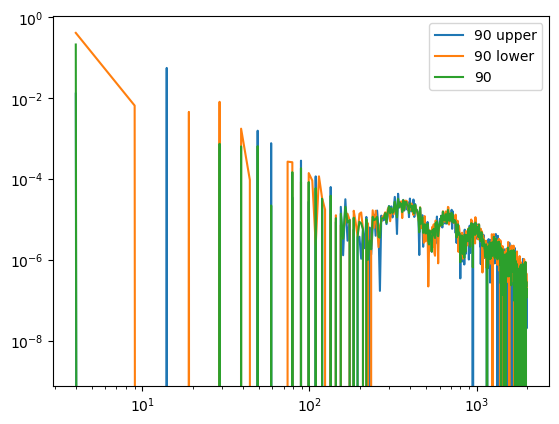

In [15]:

plt.loglog(b,sp[0,1,2,2:], label='90 upper')
plt.loglog(b,sp[1,0,2,2:], label='90 lower')
plt.loglog(b,(sp[1,0,2,2:]+sp[0,1,2,2:])/2, label='90')
#plt.loglog(b,sp[3,3,2,2:], label='150 cross')
plt.legend()

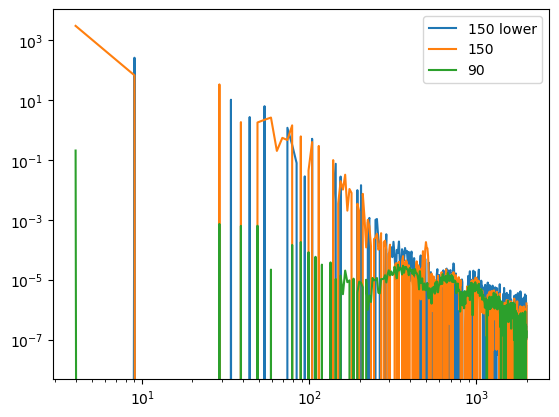

In [19]:
plt.loglog(b,sp[3,3,2,2:], label='150 lower')
plt.loglog(b,(sp[2,3,2,2:]+sp[3,2,2,2:])/2, label='150')
plt.loglog(b,(sp[1,0,2,2:]+sp[0,1,2,2:])/2, label='90')
plt.legend()

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


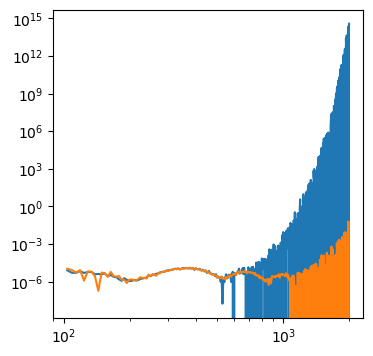

In [22]:
c = Sat4Lat(libdir,100,3000,latspectra,satspectra,0.07,0.35)
c.plot_spectra('SAT')

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:51<00:00, 19.50it/s]


Removed no burn in


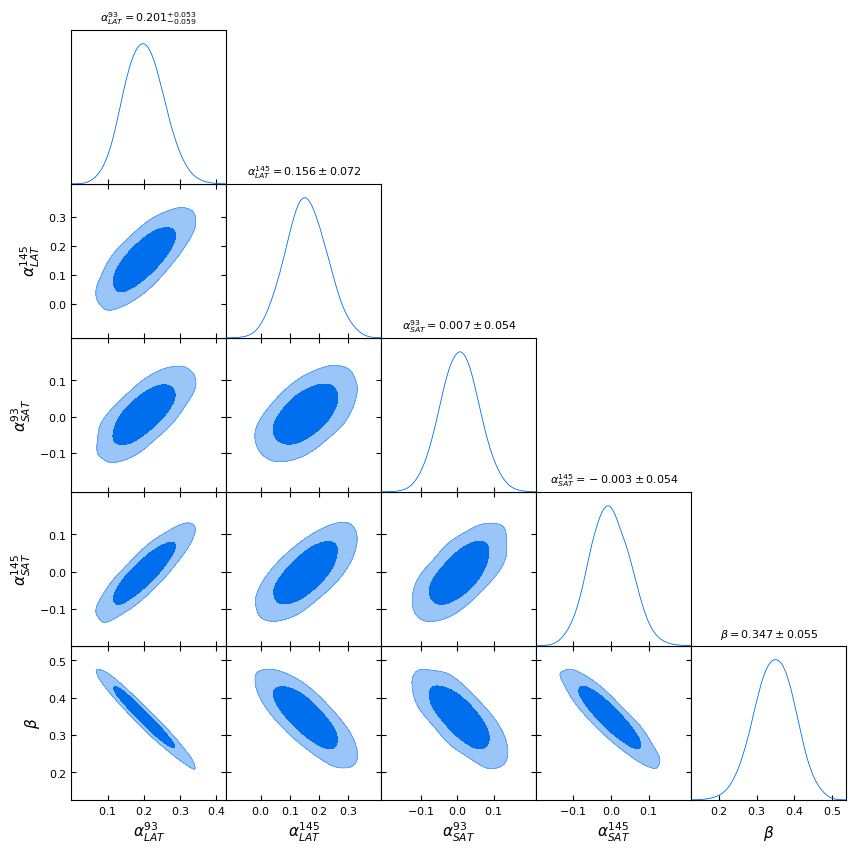

In [23]:
c.plot_getdist(100,1000,avoid_sat=False,beta_only=False)

In [55]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v1'
nside = 2048
cb_model = "iso"
beta = 0.35
alpha_lat = [0.2,0.2]
alpha_lat_err = 0.1
alpha_sat_err = 0.07
nc = 'TOD'

lat = LATskyC(libdir, nside, cb_model, beta, alpha=alpha_lat,alpha_err=alpha_lat_err, bandpass=True,verbose=True,nsplits=2,noise_model=nc)
sat = SATskyC(libdir, nside, cb_model, beta, alpha_err=alpha_sat_err, bandpass=False,verbose=True,nsplits=2,noise_model=nc)
latspectra = Spectra(lat,libdir,parallel=0,galcut=40,binwidth=5)
satspectra = Spectra(sat,libdir,parallel=0,galcut=40,CO=False,PS=False,binwidth=5)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask SAT resolution
/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scalar divide
  cov_weight[i,j] += ( tube_count * N_tels /
Noise : INFO - Noise Model: [SAT] Based on TOD and Map based simulations, directly using SO products.
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS_G40.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_b